<a href="https://colab.research.google.com/github/ParkSungHin/Python_src/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%9E%90%EC%97%B0%EC%96%B4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1.케라스로 해보는 선형회귀

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [ ]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95]   # 시간에 따른 성적

model = Sequential() # 모델 생성
model.add(Dense(1,input_dim = 1,activation='linear')) # input 차원 : 1, output 차원 ; 1

# 경사하강법 , 학습률 : 0.01
sgd = optimizers.SGD(lr=0.01)

# 손실함수 : 평균제곱오차 MSE
model.compile(optimizer=sgd,loss='mse',metrics=['mse'])

# 작업회수 : 300
model.fit(x,y, epochs=300)

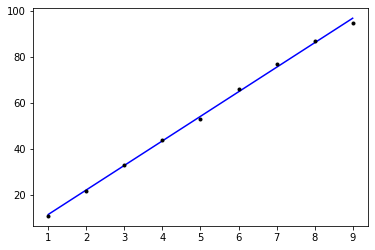

In [ ]:
plt.plot(x, model.predict(x),'b',x,y,'k.')

In [ ]:
print(model.predict([9.3]))

[[100.07276]]


## 2. 로지스틱 회귀(Logistic Regression)

2-1. 이진 분류 <br/>
시험 점수가 합격인지 불합격인지,<br/>
 혹은 어떤 메일을 받았을 때 정상 메일인지 스팸 메일인지를 분류하는 문제

<img src="https://drive.google.com/uc?id=19RwRKb7QFFkVI1rmBv-YC9SoWTdd8lTK">
<img src="https://drive.google.com/uc?id=1Mw4hrXn3vT4nUrBYEWYo6p-12dsY_24c" width=430 height=300>


### 2-2. 시그모이드 함수(Sigmoid function)

<img src="https://drive.google.com/uc?id=1K7zutDOkbNfwsBwc0tsOPc8AKbXcR6QL">


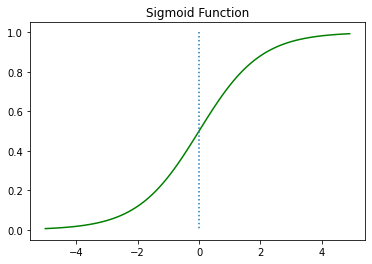

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
  return 1/(1+np.exp(-x))

x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)

plt.plot(x,y,'g')
plt.plot([0,0],[1.0,0.0],':') # 가운데 점선
plt.title('Sigmoid Function')
plt.show()


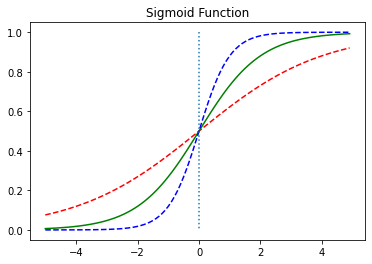

In [ ]:
# 가중치 w의 대한 변화

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(0.5*x) 
y2 = sigmoid(x)
y3 = sigmoid(2*x)

plt.plot(x,y1,'r',linestyle="--") # w = 0.5
plt.plot(x,y2,'g')  # w = 1
plt.plot(x,y3,'b',linestyle='--') # w = 2
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선
plt.title('Sigmoid Function')
plt.show()

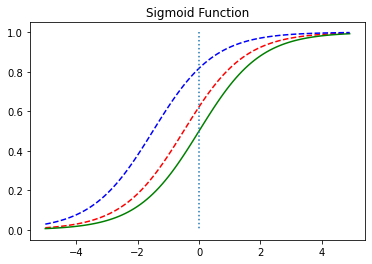

In [ ]:
# 편향 b의 대한 변화

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x + 0.5) 
y2 = sigmoid(x)
y3 = sigmoid(x + 1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 
plt.title('Sigmoid Function')
plt.show()

### 2-3. 비용 함수(Cost Function)

로지스틱 회귀에선 비용함수로 MSE(평균제곱오차)가 아닌<br/>
 목적 함수(objective function) 사용

<img src="https://drive.google.com/uc?id=1XeCW6bvteoVAzVF38uM_DOQGSWMYEL1y">


<img src="https://drive.google.com/uc?id=1g3F9W7JfaZe5gQWUE_psTe5931mOEIxB"> <br/>
<img src="https://drive.google.com/uc?id=1UFHiYIAMjeJbkkfsxQMeUyYvnAxoBDd-">


로지스틱 회귀는 0~1 사이 값을 반환한다.<br/>
위에 파란 그래프 처럼 실제값 y가 1일 때  예측값 H(x)이 0에 가까울수록  오차가 커지고 <br/>
빨간 그래프처럼 실제값 y가 0일 때 예측값 H(x)가 1에 에 가까울수록 오차가 커진다.
그에 대한 목적함수를 정리하면 위에 수식과 같다.

로지스틱 회귀에서 찾아낸 위에 비용함수를 크로스 엔트로피(Cross Entropy) 함수라 한다.

즉, 로지스틱 회귀에서 비용함수로 평균제곱오차(MSE)가 아닌
<br/>크로스 엔트로피(Cross Entropy)를 사용하여 
<br/>비용이 최소가 되는 가중치를 찾아야 한다.

##3. 로지스틱 회귀 실습

### 3-1. 케라스로 구현하는 로지스틱 회귀

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]) # 숫자 10부터 1

model = Sequential()
model.add(Dense(1, input_dim=1, activation='sigmoid'))

sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['binary_accuracy'])

model.fit(x, y, epochs=200)

Epoch 1/200


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 351ms/step - loss: 13.8758 - binary_accuracy: 0.1538
Epoch 2/200
1/1 [==============================] - 0s 11ms/step - loss: 8.4016 - binary_accuracy: 0.1538
Epoch 3/200
1/1 [==============================] - 0s 9ms/step - loss: 3.0306 - binary_accuracy: 0.1538
Epoch 4/200
1/1 [==============================] - 0s 9ms/step - loss: 0.2407 - binary_accuracy: 0.9231
Epoch 5/200
1/1 [==============================] - 0s 11ms/step - loss: 0.2314 - binary_accuracy: 0.9231
Epoch 6/200
1/1 [==============================] - 0s 7ms/step - loss: 0.2253 - binary_accuracy: 0.9231
Epoch 7/200
1/1 [==============================] - 0s 6ms/step - loss: 0.2208 - binary_accuracy: 0.9231
Epoch 8/200
1/1 [==============================] - 0s 5ms/step - loss: 0.2174 - binary_accuracy: 0.9231
Epoch 9/200
1/1 [==============================] - 0s 6ms/step - loss: 0.2148 - binary_accuracy: 0.9231
Epoch 10/200
1/1 [==============================] - 0s 6ms/step - loss:

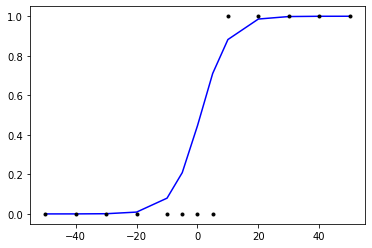

In [ ]:
plt.plot(x,model.predict(x),'b',x,y,'k.')

In [ ]:
 print(model.predict([1, 2, 3, 4, 4.5])) 
print(model.predict([11, 21, 31, 41, 500]))

[[0.5015903 ]
 [0.557082  ]
 [0.6111846 ]
 [0.66268015]
 [0.6871318 ]]
[[0.90343845]
 [0.98863393]
 [0.9987649 ]
 [0.999867  ]
 [1.        ]]


## 4. 다중 입력의 대한 실습

4-1. 다중 선형 회귀

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [ ]:
# 중간 고사, 기말 고사, 가산점 점수
x = np.array([[70,85,11], [71,89,18], [50,80,20], [99,20,10], [50,10,10]])
y = np.array([73, 82 ,72, 57, 34]) 

model = Sequential()
model.add(Dense(1,input_dim = 3, activation='linear')) 

sgd  = optimizers.SGD(lr=0.0001)
model.compile(optimizer=sgd, loss='mse',metrics=['mse'])
model.fit(x,y,epochs=2000)

In [ ]:
print(model.predict(x)) # 모든 x 값에 대하여 실제값과 근사한 예측 성공

[[72.91503]
 [81.98303]
 [72.10392]
 [57.12211]
 [33.79731]]


In [ ]:
x_test = np.array([[20,99,10],[40,50,20]]) # 학습하지 않은 데이터에 대해 예측
print(model.predict(x_test)) 

[[57.862522]
 [56.07287 ]]


### 4-2. 다중 로지스틱 회귀

In [ ]:
x = np.array([[0, 0], [0, 1], [1, 0], [0, 2], [1, 1], [2, 0]]) # [x1, x2] x1 = 꽃받침 길이, x2 = 꽃잎의 길이
y = np.array([0, 0, 0, 1, 1, 1]) # y = 꽃의 종류

model = Sequential()
model.add(Dense(1,input_dim=2, activation='sigmoid'))
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['binary_crossentropy'])
model.fit(x, y, epochs=2000)

In [ ]:
print(model.predict(x))

[[0.50013626]
 [0.59241784]
 [0.41151595]
 [0.6786107 ]
 [0.50393057]
 [0.32828563]]


## 5. 벡터와 행렬 연산

### 5-1. Tensor

In [ ]:
import numpy as np

In [ ]:
d = np.array(5)  # 0차원 텐서(스칼라)
print('텐서의 차원 :',d.ndim)
print('텐서의 크기 :',d.shape)

텐서의 차원 : 0
텐서의 크기 : ()


In [ ]:
d = np.array([1,2,3,4]) # 1차원 텐서(벡터)
print('텐서의 차원 :',d.ndim)
print('텐서의 크기 :',d.shape)

텐서의 차원 : 1
텐서의 크기 : (4,)


In [ ]:
d = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]]) # 2차원 텐서(행렬)
print('텐서의 차원 :',d.ndim)
print('텐서의 크기 :',d.shape)

텐서의 차원 : 2
텐서의 크기 : (3, 4)


In [ ]:
# 3차원 텐서(다차원 행렬)
d = np.array([  
            [[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [10, 11, 12, 13, 14]],
            [[15, 16, 17, 18, 19], [19, 20, 21, 22, 23], [23, 24, 25, 26, 27]]
            ])
print('텐서의 차원 :',d.ndim)
print('텐서의 크기(shape) :',d.shape)

텐서의 차원 : 3
텐서의 크기(shape) : (2, 3, 5)


3차원 구조부터 본격적인 Tensor, 3D Tensor<br/>
**용어 설명:** <br/>
1. samples, batch_size : 샘플의 개수
2. timesteps : 시퀀스의 길이
3. word_dim : 단어를 표현하는 벡터의 차원

문서1 : I like NLP <br/>
문서2 : I like DL <br/>
문서3 : DL is AI <br/> <br/>
<img src="https://drive.google.com/uc?id=1QqG8RQxScDeJ8us0Q-6pPq7LC7IVRWXK" width=200, height=300>


**배치(Batch)** <br/>
[[[1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 1, 0, 0, 0]],<br/>
[[1, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0]],<br/>
[[0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1]]]

3차원 텐서를 배열로 합치면 4차원, 4차원 텐서를 배열로 합치면 5차원 ....<br/>
==> 다차원 텐서

**Keras 에서 텐서** <br/>
신경망의 층에 입력의 크기(shape)를 인자로 줄 때 <br/>
"input_shape"라는 인자를 사용 <br/> 
EX) input_shape(input_length, input_dim)<br/>
input_shape(6,5) => 텐서의 크기 (?,6,5) <br/><br/>
※ batch_size 추가시 <br/>
batch_input_shape=(8, 2, 10) => 텐서의 크기 (8,2,10)

## 6. 소프트맥스 회귀(Softmax Regression)

1. 다중 클래스 분류
2. 소프트맥스 함수<br/>
(1)  선택지의 총 개수를 k라고 할 때, k차원의 벡터를 입력받아<br/>
     &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
     각 클래스에 대한 확률 추정<br/>
(2) 